## 0. Info & Summary
작성일 : 211201 / 작성자 : 김선진

## 1. 아이템 정의
CMP data EDA 

## 2. 목적
CMP cause analysis

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go

In [215]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [12]:
train_Directory = "C:\\Users\\OnePredict\\Desktop\\CMP\\2016 PHM DATA CHALLENGE CMP DATA SET\\CMP-data\\training"
train_FileList = os.listdir(train_Directory)

In [68]:
cd "C:\\Users\\OnePredict\\Desktop\\CMP\\2016 PHM DATA CHALLENGE CMP DATA SET\\CMP-data\\training"

C:\Users\OnePredict\Desktop\CMP\2016 PHM DATA CHALLENGE CMP DATA SET\CMP-data\training


### Training data 불러오기

In [151]:
df_all_train = pd.DataFrame() 
for files in train_FileList: 
    df= pd.read_csv(files) 
    df_all_train = pd.concat([df_all_train, df])

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,565.6,34.651163,0.0,156.8,1.0,60.909091
1,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.909091
2,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.909091
3,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.606061
4,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,571.2,34.651163,0.0,156.8,1.0,60.909091


In [235]:
# df_all_train

In [231]:
# plt.plot(df_all_train["TIMESTAMP"])

In [232]:
# df_all_train.columns, len(df_all_train.columns)

### Stage A와 B 로 나눈 후 Wafer_ID 별로 확인하고 싶었으나, 
#### Stage A는 1166개의 wafer // Stage B는 815개의 wafer 가 있다. (총합 1981개)
#### 전체 wafer 수는 1699개이다. 즉, Stage A,B를 같이 사용되는 Wafer 가 존재함.
#### 따라서, Stage 별로가 아닌, wafer 에 따라 확인 필요

In [156]:
### Wafer 개수 
a = df_all_train
b = a.set_index(df_all_train["WAFER_ID"], drop=True, append=False, inplace=False)
len(set(b.index))
len(df_all_train.WAFER_ID.unique())


1699

In [131]:
df_q_A = df_all_train.query("STAGE == 'A'")
df_q_B = df_all_train.query("STAGE == 'B'")
# display(df_q_A, df_q_B)
print(len(set(df_q_A.WAFER_ID)), len(set(df_q_B.WAFER_ID)))

1166 815


In [230]:
# df_q_wafer1 = df_all_train.query("WAFER_ID == 3033014282")
# fig = go.Figure()
# for i in df_q_wafer1.columns:
#     fig.add_trace(go.Scatter(x=df_q_wafer1["TIMESTAMP"], y = df_q_wafer1[i], name=i))
# fig.update_layout(title='WAFER_ID = 371447024')
# fig.show()
# # plt.scatter(x=df_q_wafer1["TIMESTAMP"] , y = df_q_wafer1["USAGE_OF_DRESSER"])

In [ ]:
## Test 와 wafer ID 가 매칭이 되지 않음 
## 즉, MRR 깍이는 정도에 따라 분류 기준을 둬야할 것으로 예상 
for i in set(df_all_train.WAFER_ID):
    if i == 373446766:
        print("!")

    else:
        pass


In [ ]:
# WAFER_ID_STAGE = pd.concat([df_all_train["WAFER_ID"],df_all_train["STAGE"]],axis=1,ignore_index=False)
# WAFER_ID_STAGE.head()

### Training Data average MRR data
#### - wafer ID, Stage, MRR data 가 있음 

In [191]:
train_MRR = pd.read_csv("C:\\Users\\OnePredict\\Desktop\\CMP\\2016 PHM DATA CHALLENGE CMP DATA SET\\CMP-training-removalrate.csv")
train_MRR.head()

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905


In [188]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_MRR['WAFER_ID'], y=train_MRR['AVG_REMOVAL_RATE'],
                         mode="markers",
                         text = train_MRR['STAGE']))
fig.update_layout(title="Average Removal Rate data",
                  yaxis_range=[0, 200],
                  template='plotly_white',
                  xaxis_title = "WAFER_ID", yaxis_title = "ARR" )
fig.show()
# plt.scatter(x=train_MRR['WAFER_ID'], y=train_MRR['AVG_REMOVAL_RATE'])
# plt.show()

#### 위 결과를 보면, [Stage A, ARR : 약4000] 에서 outlier 생기고, 이를 제거함 
#### 제거 후 결과를 보면, ARR 150mg/h와 ARR 50~100 mg/h 값이 형성되며 이 두 특정으로 나눠 볼만함. 

### 각 구간별 df 생성 


In [219]:
len(train_MRR.WAFER_ID.unique())
train_MRR.head(3)
df_outlier = pd.DataFrame() 
df_high_ARR = pd.DataFrame() 
df_low_ARR = pd.DataFrame() 

train_ARR_outlier = [i for i in train_MRR["AVG_REMOVAL_RATE"] if i > 200 ]
train_high_ARR = [i for i in train_MRR["AVG_REMOVAL_RATE"] if 200 > i > 120 ]
train_low_ARR = [i for i in train_MRR["AVG_REMOVAL_RATE"] if i < 120 ]

## df_outlier
for i in train_ARR_outlier:
    df = train_MRR.query(f"AVG_REMOVAL_RATE == {i}")
    df_outlier = pd.concat([df_outlier,df])

## df_outlier
for i in train_high_ARR:
    df = train_MRR.query(f"AVG_REMOVAL_RATE == {i}")
    df_high_ARR = pd.concat([df_high_ARR,df])

## df_outlier
for i in train_low_ARR:
    df = train_MRR.query(f"AVG_REMOVAL_RATE == {i}")
    df_low_ARR = pd.concat([df_low_ARR,df])

# display_side_by_side(df_outlier.head(), df_high_ARR.head(), df_low_ARR.head())
display(df_outlier, df_high_ARR, df_low_ARR)

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
892,1834206730,A,4202.11245
894,1834206944,A,4182.41655
897,1834206972,A,4129.49400
1675,2058207580,A,4326.15405


,WAFER_ID,STAGE,AVG_REMOVAL_RATE
8,371447024,A,149.13090
9,371447028,A,152.04915
10,371447036,A,151.70175
48,329446692,A,147.89670
49,329446708,A,151.45845
...,...,...,...
1894,2076207424,A,155.06985
1902,2076207476,A,154.37550
1903,2076207480,A,150.46965
1906,2076207484,A,148.90980


,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905
...,...,...,...
1976,33494136,A,72.76305
1977,33494140,B,85.26705
1978,33494166,A,73.33245
1979,35494162,A,74.61390


In [225]:
df_high_ARR_q = pd.DataFrame()
for i in df_high_ARR["WAFER_ID"].unique():
    df = df_all_train.query(f"WAFER_ID == {i}")
    df_high_ARR_q = pd.concat([df_high_ARR_q,df])

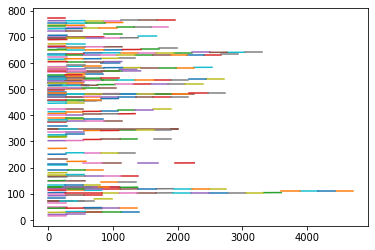

In [227]:
for i in df_high_ARR["WAFER_ID"].unique():
    df = df_high_ARR_q.query(f"WAFER_ID == {i}")
    plt.plot(df['USAGE_OF_DRESSER'])


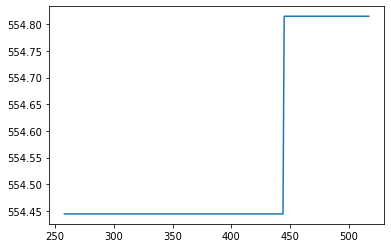

In [228]:
plt.plot(df['USAGE_OF_DRESSER'])

### MRR 데이터를 wafer ID 별로 나눈 결과, 
#### 1. Outlier : S

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_MRR["WAFER_ID"]))
fig.update_layout(title="CMP-training-001.csv")
fig.show()


In [62]:
fig = go.Figure()
for column in train_data.columns:
    fig.add_trace(go.Scatter(y=train_data[column], name = column))
fig.update_layout(title="CMP-training-001.csv")
fig.show()


In [20]:
df_all_train = pd.DataFrame()
for files in train_FileList:
    df = pd.read_csv(files, dtype={"Code":str})
    df_all_train = pd.concat([df_all_train,df])

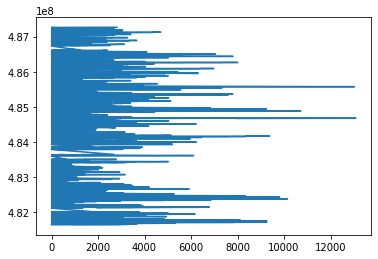

In [7]:
train_FileList['CMP-training-000.csv']

NameError: name 'train_FileList' is not defined